# World Happiness Index Project
Group Members: Ahmad Asdo, Darshil Patel, Talia Gill, and Jackson Wolf

The goal of this project is to answer these four questions:

 1. What does happiness index look like across the world?  
 2. What affects happiness index?  
 3. Can you group countries based on features such as economic production, social support, life expectancy etc?  
 4. What impact did COVID-19 have on this index?

More info on the World Happiness Index can be found [here](https://worldhappiness.report/ed/2021/)

## Import Necessary Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import interact
import ipywidgets as widgets

import plotly.express as px

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [59]:
wh1 = pd.read_csv('data/world-happiness-report.csv')
wh2021 = pd.read_csv('data/world-happiness-report-2021.csv')
wh2021.sample(10)
wh1

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

In [79]:

wh2= wh1.drop("Country name", axis=1)
wh2

year  Life Ladder  Log GDP per capita  Social support  \
0     2008        3.724               7.370           0.451   
1     2009        4.402               7.540           0.552   
2     2010        4.758               7.647           0.539   
3     2011        3.832               7.620           0.521   
4     2012        3.783               7.705           0.521   
...    ...          ...                 ...             ...   
1944  2016        3.735               7.984           0.768   
1945  2017        3.638               8.016           0.754   
1946  2018        3.616               8.049           0.775   
1947  2019        2.694               7.950           0.759   
1948  2020        3.160               7.829           0.717   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 10 columns]

## Question #1: What does happiness index look like across the world?

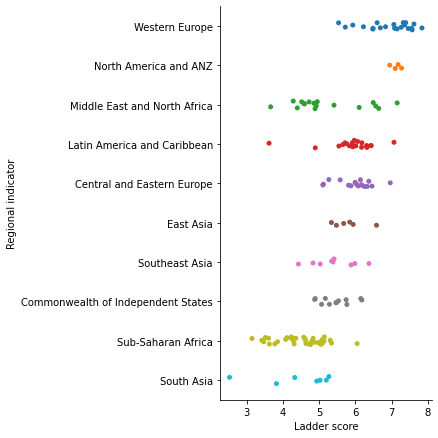

In [6]:
happy_by_country = sns.catplot( #don't have to use this i just made this at some point last week and might be helpful
    data=wh2021,
    y='Regional indicator', x="Ladder score",
    ci=None, orient='h', height=6
)

## Question #2: What affects happiness index?

In [87]:
from sklearn.preprocessing import StandardScaler
wh2_scaled = StandardScaler(with_std=False).fit_transform(
wh2.fillna(0)
)
wh2_scaled

array([[-5.21600821e+00, -1.74270549e+00, -1.82540790e+00, ...,
         1.77042073e-01, -1.83988712e-01, -8.33966136e-03],
       [-4.21600821e+00, -1.06470549e+00, -1.65540790e+00, ...,
         1.45042073e-01, -1.17988712e-01, -2.93396614e-02],
       [-3.21600821e+00, -7.08705490e-01, -1.54840790e+00, ...,
         2.04207286e-03, -8.39887122e-02,  8.66033864e-03],
       ...,
       [ 4.78399179e+00, -1.85070549e+00, -1.14640790e+00, ...,
         1.39042073e-01,  8.01128784e-03, -5.43396614e-02],
       [ 5.78399179e+00, -2.77270549e+00, -1.24540790e+00, ...,
         1.26042073e-01,  1.40112878e-02, -3.13396614e-02],
       [ 6.78399179e+00, -2.30670549e+00, -1.36640790e+00, ...,
         8.40420729e-02,  1.01128784e-03,  7.96603386e-02]])

In [95]:
df = pd.DataFrame(wh2_scaled, columns=['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'])

In [97]:
df

year  Life Ladder  Log GDP per capita  Social support  \
0    -5.216008    -1.742705           -1.825408       -0.356132   
1    -4.216008    -1.064705           -1.655408       -0.255132   
2    -3.216008    -0.708705           -1.548408       -0.268132   
3    -2.216008    -1.634705           -1.575408       -0.286132   
4    -1.216008    -1.683705           -1.490408       -0.286132   
...        ...          ...                 ...             ...   
1944  2.783992    -1.731705           -1.211408       -0.039132   
1945  3.783992    -1.828705           -1.179408       -0.053132   
1946  4.783992    -1.850705           -1.146408       -0.032132   
1947  5.783992    -2.772705           -1.245408       -0.048132   
1948  6.783992    -2.306705           -1.366408       -0.090132   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                           -10.771398                     -0.012366   
1                           -10.371398                     -0.051366   
2                            -9.971398                     -0.130366   
3                            -9.651398                     -0.234366   
4                            -9.331398                     -0.199366   
...                                ...                           ...   
1944                         -7.171398                      0.002634   
1945                         -6.571398                      0.022634   
1946                         -5.971398                      0.032634   
1947                         -5.371398                     -0.098366   
1948                         -4.771398                     -0.087366   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.167901                   0.177042        -0.183989         -0.00834  
1       0.189901                   0.145042        -0.117989         -0.02934  
2       0.120901                   0.002042        -0.083989          0.00866  
3       0.161901                   0.026042        -0.090989          0.00066  
4       0.235901                   0.071042         0.008011          0.00166  
...          ...                        ...              ...              ...  
1944   -0.095099                   0.019042         0.036011         -0.05734  
1945   -0.098099                   0.046042         0.104011         -0.04234  
1946   -0.068099                   0.139042         0.008011         -0.05434  
1947   -0.064099                   0.126042         0.014011         -0.03134  
1948   -0.009099                   0.084042         0.001011          0.07966  

[1949 rows x 10 columns]

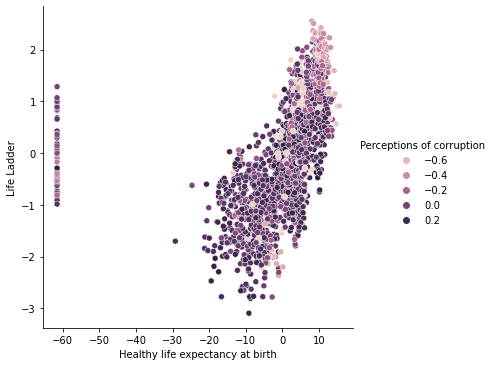

In [99]:
ax = sns.relplot(x="Healthy life expectancy at birth", y="Life Ladder", data=df, hue="Perceptions of corruption", kind="scatter")

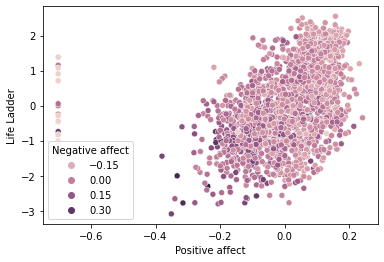

In [122]:
fg = sns.scatterplot(x="Positive affect", y="Life Ladder", hue = "Negative affect", data=df,
            )

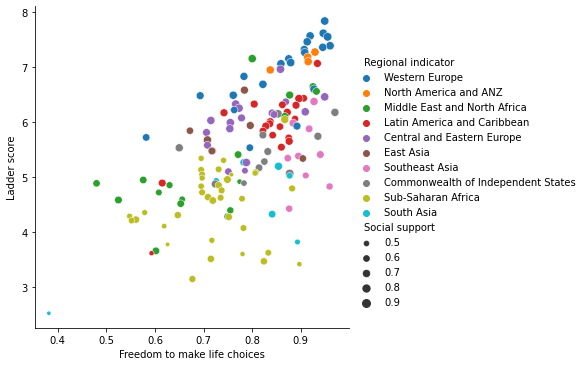

In [9]:
fg = sns.relplot(x="Freedom to make life choices", y="Ladder score", data=wh2021,hue="Regional indicator", kind="scatter", size="Social support")

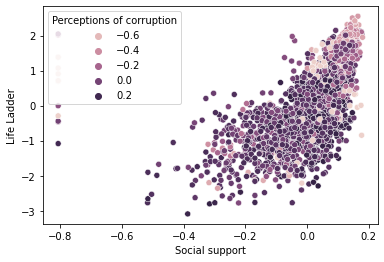

In [108]:
SN= sns.scatterplot("Social support", "Life Ladder", hue="Perceptions of corruption", data=df)


In [12]:
wh.loc[wh['Life Ladder'] == 2.3750000]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
11  Afghanistan  2019        2.375               7.697            0.42   

    Healthy life expectancy at birth  Freedom to make life choices  \
11                              52.4                         0.394   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
11      -0.108                      0.924            0.351            0.502

In [13]:
wh.loc[wh['Life Ladder'] == 8.019000]

Country name  year  Life Ladder  Log GDP per capita  Social support  \
449      Denmark  2005        8.019              10.851           0.972   

     Healthy life expectancy at birth  Freedom to make life choices  \
449                              69.6                         0.971   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
449         NaN                      0.237             0.86            0.154

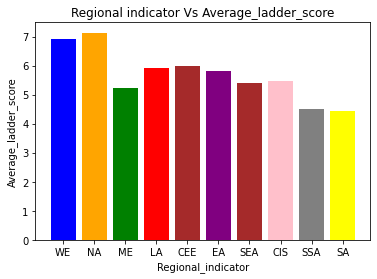

In [116]:
Regional_indicator = ['WE','NA', 'ME', 'LA', 'CEE', 'EA', 'SEA' , 'CIS' , 'SSA' , 'SA']

Average_ladder_score = [6.914905, 7.128500, 5.219765, 5.908050, 5.984765, 5.810333, 5.407556, 5.467000, 4.494472, 4.441857]

c=["blue","orange","green","red","brown","purple","brown","pink","grey","yellow","cyan"]

plt.bar(Regional_indicator, Average_ladder_score, color=c)
plt.title('Regional indicator Vs Average_ladder_score')
plt.xlabel('Regional_indicator')
plt.ylabel('Average_ladder_score')
plt.show()

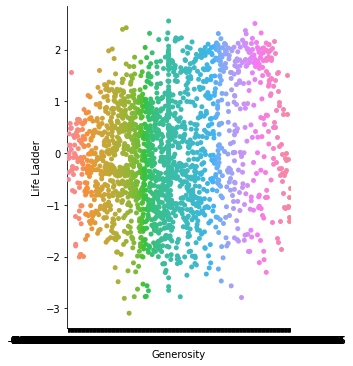

In [112]:
sns.catplot('Generosity', 'Life Ladder', data=df)

<AxesSubplot:>

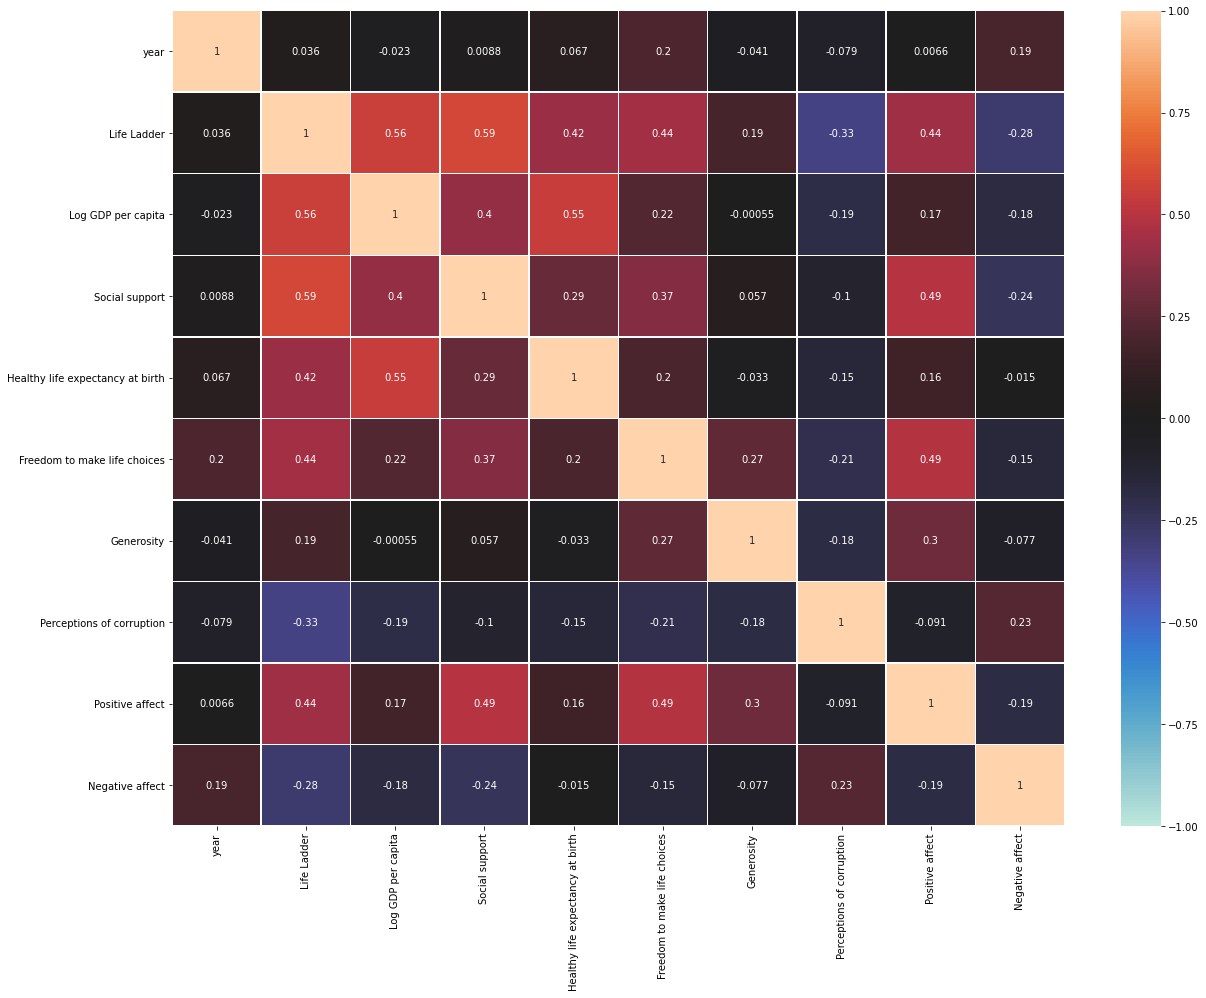

In [114]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )

Impact of religion?

In [ ]:
relig = pd.read_csv('data/countryReligion.csv')
relig = relig[relig['country'].isin(wh2021['Country name'].unique())].reset_index(drop=True)
maxValueIndexObj = relig[['chistians', 'muslims', 'unaffiliated', 'hindus', 'buddhists', 'folkReligions', 'other', 'jews']].idxmax(axis=1)
relig['primary_religion']=(maxValueIndexObj)
relig = relig.rename(columns={'country': 'Country name'})[['Country name', 'primary_religion']]
wh_relig = pd.merge(wh2021, relig, on='Country name')

happy_by_religion = sns.catplot( 
    data=wh_relig,
    y='primary_religion', x="Ladder score",
    ci=None, orient='h', height=6
)

Although this is interesting, I think we would find other factors like GDP or social support to be higher among Jewish and unaffiliated countries for example and Religion wouldn't be the main cause of lower ladder score

In [ ]:
gdp_by_religion = sns.catplot( 
    data=wh_relig,
    y='primary_religion', x="Logged GDP per capita",
    ci=None, orient='h', height=6
)

As predicted this plot is almost identical to the previous one in terms of distribution

## Question #3: Can you group countries based on features such as economic production, social support, life expectancy etc?

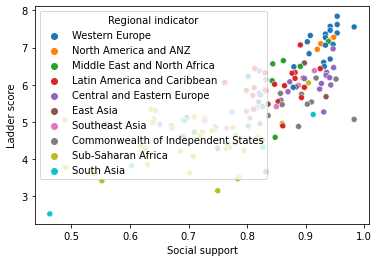

In [12]:
groupby_Social_support = sns.scatterplot(x="Social support", y="Ladder score", data=wh2021, hue = "Regional indicator")

In [13]:
type(groupby_Social_support)

matplotlib.axes._subplots.AxesSubplot

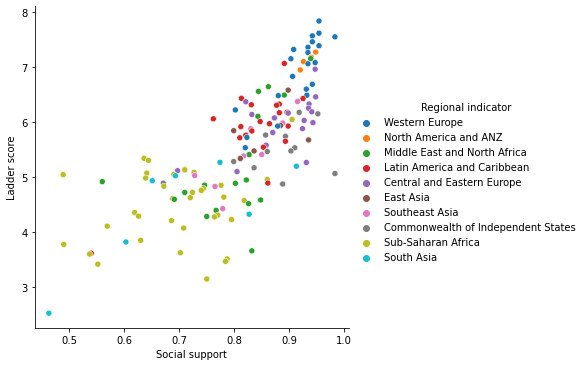

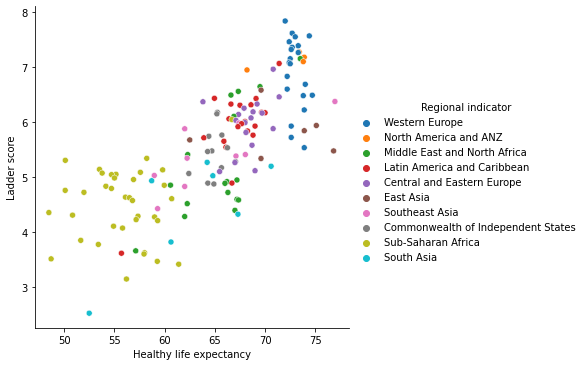

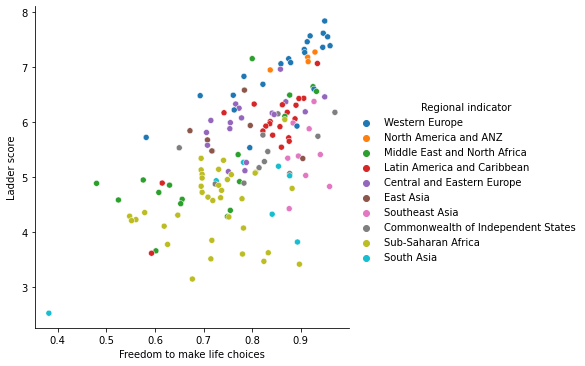

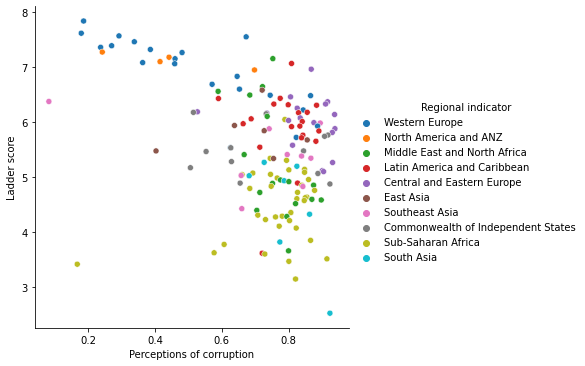

In [14]:
groupby_Social_support = sns.relplot(x="Social support", y="Ladder score", data=wh2021, kind="scatter",
            hue="Regional indicator")
groupby_Healthy_life_expectancy = sns.relplot(x="Healthy life expectancy", y="Ladder score", data=wh2021, kind="scatter",
            hue="Regional indicator")
groupby_Freedom_to_make_life_choices = sns.relplot(x="Freedom to make life choices", y="Ladder score", data=wh2021, kind="scatter",
            hue="Regional indicator")
groupby_Perceptions_of_corruption = sns.relplot(x="Perceptions of corruption", y="Ladder score", data=wh2021, kind="scatter",
            hue="Regional indicator")


In [15]:
wh2021 = wh2021.rename(columns={
    "Regional indicator":"Region",
})
wh2021.head()


Country name          Region  Ladder score  Standard error of ladder score  \
0      Finland  Western Europe         7.842                           0.032   
1      Denmark  Western Europe         7.620                           0.035   
2  Switzerland  Western Europe         7.571                           0.036   
3      Iceland  Western Europe         7.554                           0.059   
4  Netherlands  Western Europe         7.464                           0.027   

   upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0         7.904         7.780                 10.775           0.954   
1         7.687         7.552                 10.933           0.954   
2         7.643         7.500                 11.117           0.942   
3         7.670         7.438                 10.878           0.983   
4         7.518         7.410                 10.932           0.942   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.0                         0.949      -0.098   
1                     72.7                         0.946       0.030   
2                     74.4                         0.919       0.025   
3                     73.0                         0.955       0.160   
4                     72.4                         0.913       0.175   

   Perceptions of corruption  Ladder score in Dystopia  \
0                      0.186                      2.43   
1                      0.179                      2.43   
2                      0.292                      2.43   
3                      0.673                      2.43   
4                      0.338                      2.43   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.446                         1.106   
1                             1.502                         1.108   
2                             1.566                         1.079   
3                             1.482                         1.172   
4                             1.501                         1.079   

   Explained by: Healthy life expectancy  \
0                                  0.741   
1                                  0.763   
2                                  0.816   
3                                  0.772   
4                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

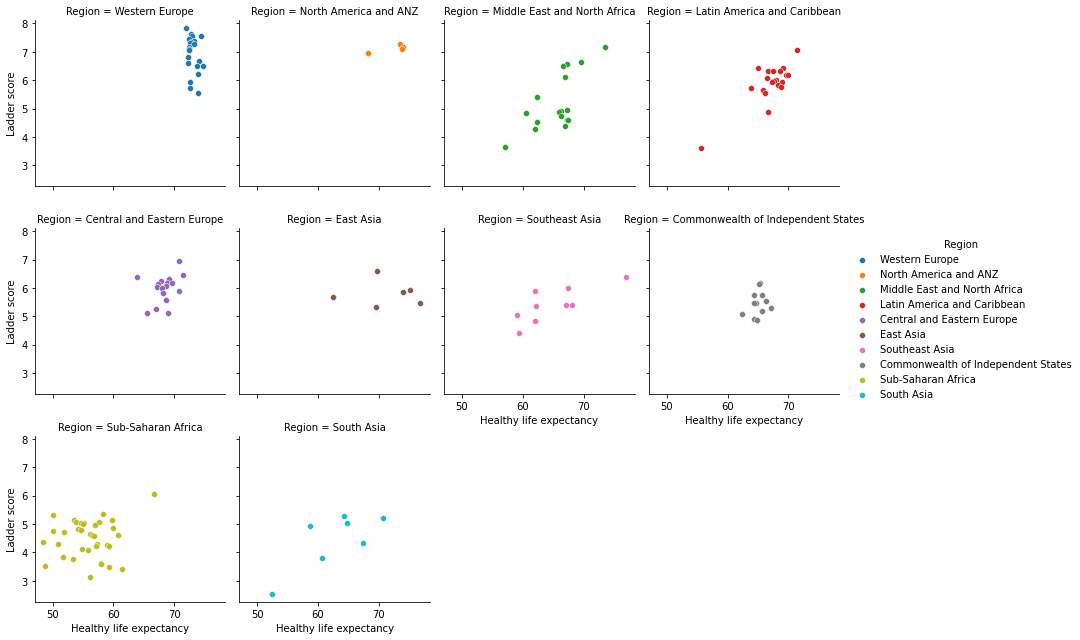

In [16]:
grid = sns.FacetGrid(wh2021, col = "Region", hue = "Region", col_wrap=4)
grid.map(sns.scatterplot, "Healthy life expectancy", "Ladder score")

grid.add_legend()

plt.show()

## Question #4: What impact did COVID-19 have on this index?



Here we are combining the 2021 index with the indices of the past to help understand how happiness changed right before and right after the global pandemic. The index is published in March of each year, which works out pretty nicely as in 2020 March, the pandemic had yet to really take affect and had just been announced an official pandemic by the World Health Organization. And in March 2021, the pandemic was still going pretty strong at least in the United States and the vaccine had yet to become widely available which is still true in many countries.

In [19]:
wh2021_j = wh2021.drop(columns=['Region', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
wh2021_j['year'] = 2021
wh2021_j = wh2021_j[wh2021_j['Country name'].isin(wh[wh['year']==2020]['Country name'].unique())]
wh2021_j = wh2021_j.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
wh_j = wh.drop(columns=['Positive affect', 'Negative affect'])
wh_j = wh_j[wh_j['Country name'].isin(wh2021_j['Country name'].unique())]
wh_j=wh_j.append(wh2021_j) 

Unfortunately, only 95 countries had data for both 2020 and 2021. To get more information on a specific country, the widget below accepts a country's name as input

In [20]:
#Widget if curious about a specific country
def countrySelector(country):
    print('Change before and after the pandemic:', -1*round(list(wh_j[(wh_j['Country name']==country) & (wh_j['year'] == 2020)]['Life Ladder'])[0] - list(wh_j[(wh_j['Country name']==country) & (wh_j['year'] == 2021)]['Life Ladder'])[0], 4))
    return sns.scatterplot(data=wh_j[wh_j['Country name'] == country], x='year', y='Life Ladder')

interact(countrySelector, country='United States');

interactive(children=(Text(value='United States', description='country'), Output()), _dom_classes=('widget-int…

Let's create a new table with each countries change before and after the pandemic.

In [21]:
wh_j_sorted=wh_j.sort_values(by='Country name')
rona_diff = []
summ = 0
for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Life Ladder'])[i]) * -1)
        summ+= rona_diff[i]
average_rona_diff = summ/len(wh_j_sorted[wh_j_sorted['year']==2020])
differ = pd.DataFrame()
differ['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ['rona_diff'] = rona_diff
differ.reset_index(drop=True)
print('On average, the world\'s happiness changed by', round(average_rona_diff, 6), '\n Life Ladder score after the pandemic and here we can see \n the countries where happiness increased the most and \n where it decreased the most before and after the pandemic.')
differ.sort_values(by='rona_diff')


On average, the world's happiness changed by -0.001474 
 Life Ladder score after the pandemic and here we can see 
 the countries where happiness increased the most and 
 where it decreased the most before and after the pandemic.


Country name  rona_diff
1933       Zambia     -0.765
1279      Nigeria     -0.744
422       Croatia     -0.626
944    Kyrgyzstan     -0.506
356         China     -0.432
...           ...        ...
277      Cambodia      0.453
117       Bahrain      0.474
527   El Salvador      0.599
174         Benin      0.637
1394  Philippines      0.800

[95 rows x 2 columns]

On average, the world's happiness didn't change by very much, just decreasing by .0015, which is strange considering the impact COVID-19 had on the world. Maybe by looking at coronavirus data, we'll be able to explain why some countries weren't negatively impacted. But even if the pandemic was handled well it's strange that some countries would have such dramatic increases between 2020 and 2021.

In [22]:
le_rona = pd.read_csv('data/owid-covid-data.csv') #add rona data to compare happiness and rona
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ, le_rona, on='Country name')

In [23]:
px.scatter(rona_differ, y='rona_diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

Based on this scatterplot, it doesn't seem like the number of deaths caused by the coronavirus nor the deaths per case has any relationship with the change in overall happiness for these countries. But maybe other measures have been impacted?

In [25]:
 #create diff columns for each of the measures we haven't looked at
wh_j = wh_j.drop(columns=['Perceptions of corruption', 'Log GDP per capita', 'social_support_level', 'Healthy_life_expectancy_level', 'Logged_GDP_per_capita_level'])
wh_j = wh_j[(wh_j['year']==2021) | (wh_j['year']==2020)]
wh_j_sorted=wh_j.sort_values(by='Country name') 
wh_j_sorted=wh_j_sorted.dropna()
rona_diff_social = []
rona_diff_free = []
rona_diff_gener = []
sum_social = 0
sum_free = 0
sum_gener = 0

for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff_social.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Social support'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Social support'])[i]) * -1)
        rona_diff_free.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Freedom to make life choices'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Freedom to make life choices'])[i]) * -1)
        rona_diff_gener.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Generosity'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Generosity'])[i]) * -1)     
        sum_social+= rona_diff_social[i]
        sum_free+= rona_diff_free[i]
        sum_gener+= rona_diff_gener[i]
average_rona_diff_social = sum_social/len(wh_j_sorted[wh_j_sorted['year']==2020])
average_rona_diff_free = sum_free/len(wh_j_sorted[wh_j_sorted['year']==2020])
average_rona_diff_gener = sum_gener/len(wh_j_sorted[wh_j_sorted['year']==2020])
differ2 = pd.DataFrame()
differ2['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ2['rona_diff_social'] = rona_diff_social
differ2['rona_diff_free'] = rona_diff_free
differ2['rona_diff_gener'] = rona_diff_gener
differ2.reset_index(drop=True)
print('On average, the world\'s social support changed by', round(average_rona_diff_social, 6), '\n after the pandemic.')
print('On average, the world\'s freedom to make choices changed by', round(average_rona_diff_free, 6), '\n after the pandemic.')
print('On average, the world\'s generosity changed by', round(average_rona_diff_gener, 6), '\n after the pandemic.')
differ2

On average, the world's social support changed by 0.002383 
 after the pandemic.
On average, the world's freedom to make choices changed by -0.005679 
 after the pandemic.
On average, the world's generosity changed by -0.019148 
 after the pandemic.


Country name  rona_diff_social  rona_diff_free  rona_diff_gener
24           Albania            -0.013           0.031           -0.037
51         Argentina             0.001           0.005           -0.060
79         Australia             0.003           0.009           -0.051
92           Austria             0.009          -0.004            0.031
132       Bangladesh            -0.046           0.100           -0.032
...              ...               ...             ...              ...
1835  United Kingdom             0.005          -0.026            0.030
1850   United States            -0.017          -0.013            0.064
1865         Uruguay             0.004          -0.012           -0.008
1933          Zambia            -0.059           0.032            0.005
1948        Zimbabwe             0.033           0.034           -0.038

[81 rows x 4 columns]

In [26]:
le_rona = pd.read_csv('data/owid-covid-data.csv') #add rona data 
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ2['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ2, le_rona, on='Country name')

In [27]:
px.scatter(rona_differ, y='rona_diff_social', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Social Support',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff_social': 'Social Support Change After Pandemic'}, hover_name='Country name')

In [28]:
px.scatter(rona_differ, y='rona_diff_free', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Freedom to Make Life Choices',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff_free': 'Change in Freedom to Make Choices After Pandemic'}, hover_name='Country name')

In [29]:
px.scatter(rona_differ, y='rona_diff_gener', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Generosity',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff_gener': 'Generosity Change After Pandemic'}, hover_name='Country name')

Again, no trends with any of the measures. Based on this exploration of the happiness and coronavirus data, we would conclude that COVID-19 didn't have an impact on the happiness index. However, we know that for many people the pandemic and virus negatively impacted their lives, with millions losing their jobs, losing loved ones, and data supporting rises in mental illness and increased poverty levels. The data doesn't seem like it's able to capture the impact of covid

Or maybe I'm just looking at the wrong data, let's do 2020 and 2019 like the report did.

In [ ]:
wh_k = wh[(wh['year'] == 2020) | (wh['year']==2019)]
wh_k = wh_k[wh_k['Country name'].isin(list(wh[wh['year']==2020]['Country name']))]
wh_k = wh_k[wh_k['Country name'].isin(list(wh[wh['year']==2019]['Country name']))]
wh_k

In [ ]:
wh_k.groupby('year').mean()

In [ ]:
wh_k_2020 = wh_k[wh_k['year'] == 2020].drop(columns=['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']).rename(columns={'Life Ladder':'Life Ladder 2020', 'Positive affect': 'Positive affect 2020', 'Negative affect': 'Negative affect 2020'})
wh_k_2019 = wh_k[wh_k['year']==2019].drop(columns=['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
wh_k_merge = wh_k_2019.merge(wh_k_2020, on='Country name') # combine 2019 and 2020 year data

le_rona = pd.read_csv('data/owid-covid-data.csv') #add rona data for the countries in the dataset
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(wh_k_merge['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(wh_k_merge, le_rona, on='Country name')
rona_differ

In [ ]:
rona_differ['Negative affect diff'] = rona_differ['Negative affect 2020'] - rona_differ['Negative affect'] #create diff variables for 2019 and 2020
rona_differ['Positive affect diff'] = rona_differ['Positive affect 2020'] - rona_differ['Positive affect']

In [ ]:
#scatterplot for negative affect and deaths
px.scatter(rona_differ, y='Negative affect diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Negative Emotions',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'Negative affect diff': 'Increase in Negative Emotions'}, hover_name='Country name')

In [ ]:
rona_differ = pd.merge(rona_differ, wh2021[wh2021['Country name'].isin(rona_differ['Country name'])][['Country name', 'Region']], on='Country name')
neg_impact_by_region = sns.catplot( #Add regions and make a cat plot for regions
    data=rona_differ,
    y='Region', x="Negative affect diff",
    ci=None, orient='h', height=6
)